In [1]:
import matplotlib.pyplot as plt
import pandas as pd

## Open results file and clean data

In [2]:
RESULT_FNAME = '../data/result.csv'

result_file = open(RESULT_FNAME, 'r')
data = result_file.read()
result_file.close()
data = data.split('\n')

In [3]:
field_names = data[0].split(',')
data = data[1:]

In [4]:
# Clean up data
def clean_field(field):
    start = field.find('\x00')
    if start >= 0:
        field = field[1:]
        field = clean_field(field)
    start = field.find(')')
    if start > 0:
        field = field[start+1:]
    return field

In [5]:
data = [line.split(',') for line in data]

clean_data = []
for fields in data:
    if len(fields) < 10:
        continue
    fields = [field.strip() for field in fields]
    fields = [clean_field(field) for field in fields]
    fields = [int(field) for field in fields]
    if fields[2] == 0:
        continue
    clean_data.append(fields)

data = clean_data

## Show initial data

In [6]:
df = pd.DataFrame(data, columns=field_names)

In [7]:
df

,Block,CodeSize,ProofSize,RLPSize,UnRLPSize,SnappySize,Indices,ZeroLevels,Hashes,Leaves
0,8052259,412332,298758,315341,455867,170371,11592,1678,185824,99664
1,8052260,444324,329453,347901,507108,202460,12700,2024,205056,109673
2,8052261,505889,359237,379150,547921,214926,13768,2059,224864,118546
3,8052262,477627,358953,379192,556080,218976,14056,2253,221536,121108
4,8052263,392296,273773,289033,419970,165731,10524,1638,170944,90667
...,...,...,...,...,...,...,...,...,...,...
1016690,9101936,302638,183592,193794,281243,112661,7032,1090,114976,60494
1016691,9101937,78707,56724,59976,88746,35910,2212,395,34752,19365
1016692,9101938,164468,108255,114293,165282,66809,4080,659,67872,35644
1016693,9101940,82539,42713,45132,66126,25941,1664,275,26240,14534


## Calculate Proof size % compared vs code size

In [8]:
def print_stats(df, field):
    print(field)
    print('\tMean:', df[field].mean())
    print('\tMin:', df[field].min())
    print('\tMax:', df[field].max())

In [9]:
TOTAL_BLOCKS = len(df)

In [10]:
# Calculate proof sizes compared with total code size
df['RLPSize_perc'] = (df['RLPSize'] / df['CodeSize']) * 100
df['UnRLPSize_perc'] = (df['UnRLPSize'] / df['CodeSize']) * 100
df['SnappySize_perc'] = (df['SnappySize'] / df['CodeSize']) * 100
df

,Block,CodeSize,ProofSize,RLPSize,UnRLPSize,SnappySize,Indices,ZeroLevels,Hashes,Leaves,RLPSize_perc,UnRLPSize_perc,SnappySize_perc
0,8052259,412332,298758,315341,455867,170371,11592,1678,185824,99664,76.477450,110.558239,41.318889
1,8052260,444324,329453,347901,507108,202460,12700,2024,205056,109673,78.298944,114.130229,45.565848
2,8052261,505889,359237,379150,547921,214926,13768,2059,224864,118546,74.947271,108.308542,42.484814
3,8052262,477627,358953,379192,556080,218976,14056,2253,221536,121108,79.390822,116.425579,45.846654
4,8052263,392296,273773,289033,419970,165731,10524,1638,170944,90667,73.677274,107.054367,42.246416
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016690,9101936,302638,183592,193794,281243,112661,7032,1090,114976,60494,64.034920,92.930498,37.226323
1016691,9101937,78707,56724,59976,88746,35910,2212,395,34752,19365,76.201608,112.754901,45.624913
1016692,9101938,164468,108255,114293,165282,66809,4080,659,67872,35644,69.492546,100.494929,40.621276
1016693,9101940,82539,42713,45132,66126,25941,1664,275,26240,14534,54.679606,80.114855,31.428779


## Print stats for relevant fields

In [11]:
# Slim
print_stats(df, 'RLPSize_perc')

RLPSize_perc
	Mean: 72.44457002154
	Min: 7.231659865236785
	Max: 919.9999999999999


In [12]:
# Baseline
print_stats(df, 'UnRLPSize_perc')

UnRLPSize_perc
	Mean: 105.27068413203175
	Min: 9.015848913352947
	Max: 1891.111111111111


In [13]:
# Snappy
print_stats(df, 'SnappySize_perc')

SnappySize_perc
	Mean: 41.348024095963254
	Min: 5.694220366328176
	Max: 1060.0


In [14]:
print_stats(df, 'CodeSize')

CodeSize
	Mean: 383297.62630385713
	Min: 45
	Max: 1403536


In [15]:
# Slim
print_stats(df, 'RLPSize')

RLPSize
	Mean: 279160.0500749979
	Min: 414
	Max: 1000934


In [16]:
# Baseline
print_stats(df, 'UnRLPSize')

UnRLPSize
	Mean: 405677.3741977683
	Min: 851
	Max: 1462252


In [17]:
print_stats(df, 'SnappySize')

SnappySize
	Mean: 159031.27558805738
	Min: 477
	Max: 564089


## Show DataFrame sorted by RLPSize

In [18]:
df.sort_values(by=['RLPSize'])

,Block,CodeSize,ProofSize,RLPSize,UnRLPSize,SnappySize,Indices,ZeroLevels,Hashes,Leaves,RLPSize_perc,UnRLPSize_perc,SnappySize_perc
826752,8904950,45,382,414,851,477,16,12,160,194,920.000000,1891.111111,1060.000000
584883,8654146,45,382,414,851,477,16,12,160,194,920.000000,1891.111111,1060.000000
973068,9056899,761,507,541,884,502,16,9,288,194,71.090670,116.162943,65.965834
119669,8175334,761,507,541,884,502,16,9,288,194,71.090670,116.162943,65.965834
133807,8189815,761,507,541,884,502,16,9,288,194,71.090670,116.162943,65.965834
...,...,...,...,...,...,...,...,...,...,...,...,...,...
928947,9011177,1233204,921375,972619,1416265,546210,35752,5417,575456,304750,78.869271,114.844340,44.291942
930284,9012554,1332714,922925,974084,1413273,551134,35588,5330,578176,303831,73.090250,106.044733,41.354259
604650,8674542,1316359,940581,993244,1452741,564089,36660,5742,584512,313667,75.453885,110.360548,42.852216
951652,9034717,1227780,946399,999345,1462252,547321,37352,5621,585600,317826,81.394468,119.097232,44.578100


## Show DataFrame sorted by RLPSize %

In [19]:
df.sort_values(by=['RLPSize_perc'])

,Block,CodeSize,ProofSize,RLPSize,UnRLPSize,SnappySize,Indices,ZeroLevels,Hashes,Leaves,RLPSize_perc,UnRLPSize_perc,SnappySize_perc
699736,8772795,10537,726,762,950,600,16,4,512,194,7.231660,9.015849,5.694220
139498,8195635,36997,3635,3836,5444,2427,128,23,2304,1180,10.368408,14.714707,6.559991
906683,8988154,24138,2607,2742,3720,1924,80,13,1792,722,11.359682,15.411385,7.970834
796450,8873385,34747,3798,3990,5190,2695,112,14,2624,1048,11.483006,14.936541,7.756065
595526,8665134,20180,2267,2381,3108,1618,68,8,1568,623,11.798811,15.401388,8.017839
...,...,...,...,...,...,...,...,...,...,...,...,...,...
656749,8728364,536,1681,1799,3083,1385,72,27,864,718,335.634328,575.186567,258.395522
784163,8860675,365,1190,1265,1956,790,48,12,672,458,346.575342,535.890411,216.438356
303430,8363515,365,1190,1265,1956,790,48,12,672,458,346.575342,535.890411,216.438356
584883,8654146,45,382,414,851,477,16,12,160,194,920.000000,1891.111111,1060.000000


## Get Rows where the RLPSize is > 100% of CodeSize

In [20]:
rlp_perc_gt_100 = df[df.RLPSize_perc > 100]
rlp_perc_gt_100

,Block,CodeSize,ProofSize,RLPSize,UnRLPSize,SnappySize,Indices,ZeroLevels,Hashes,Leaves,RLPSize_perc,UnRLPSize_perc,SnappySize_perc
103,8052361,204817,210036,221779,323110,112386,8464,1156,128480,71936,108.281539,157.755460,54.871422
564,8052835,4569,12406,13099,18997,4888,540,53,7296,4517,286.692931,415.780258,106.981834
584,8052856,103545,105617,111644,166016,61695,4312,679,63936,36690,107.821720,160.332223,59.582790
598,8052872,17591,19247,20330,29668,9009,808,99,11488,6852,115.570462,168.654426,51.213689
635,8052910,22697,25300,26701,38477,12730,1024,124,15456,8696,117.641098,169.524607,56.086707
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015694,9100906,145611,138062,145811,213253,80172,5464,820,85088,46690,100.137352,146.453908,55.059027
1015844,9101058,143563,141449,149422,219479,82296,5632,861,86880,48076,104.081135,152.879920,57.323962
1016267,9101495,193960,191236,201909,294755,108527,7660,1075,117632,64869,104.098268,151.966900,55.953289
1016419,9101654,3097,3221,3426,5337,2556,120,39,1824,1238,110.623184,172.328059,82.531482


In [21]:
# RLPSize greater than CodeSize
rlp_size_gt_cs = df[(df.RLPSize > df.CodeSize)]
rlp_size_gt_cs

,Block,CodeSize,ProofSize,RLPSize,UnRLPSize,SnappySize,Indices,ZeroLevels,Hashes,Leaves,RLPSize_perc,UnRLPSize_perc,SnappySize_perc
103,8052361,204817,210036,221779,323110,112386,8464,1156,128480,71936,108.281539,157.755460,54.871422
564,8052835,4569,12406,13099,18997,4888,540,53,7296,4517,286.692931,415.780258,106.981834
584,8052856,103545,105617,111644,166016,61695,4312,679,63936,36690,107.821720,160.332223,59.582790
598,8052872,17591,19247,20330,29668,9009,808,99,11488,6852,115.570462,168.654426,51.213689
635,8052910,22697,25300,26701,38477,12730,1024,124,15456,8696,117.641098,169.524607,56.086707
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015694,9100906,145611,138062,145811,213253,80172,5464,820,85088,46690,100.137352,146.453908,55.059027
1015844,9101058,143563,141449,149422,219479,82296,5632,861,86880,48076,104.081135,152.879920,57.323962
1016267,9101495,193960,191236,201909,294755,108527,7660,1075,117632,64869,104.098268,151.966900,55.953289
1016419,9101654,3097,3221,3426,5337,2556,120,39,1824,1238,110.623184,172.328059,82.531482


In [63]:
rlp_size_gt_cs_perc = (len(rlp_size_gt_cs) / TOTAL_BLOCKS) * 100
rlp_size_gt_cs_perc

0.7892239068747263

### Sorted by RLPSize %

In [22]:
rlp_size_gt_cs.sort_values(by=['RLPSize_perc'])

,Block,CodeSize,ProofSize,RLPSize,UnRLPSize,SnappySize,Indices,ZeroLevels,Hashes,Leaves,RLPSize_perc,UnRLPSize_perc,SnappySize_perc
489054,8556318,470457,445237,470471,695880,256739,18040,2765,271200,153232,100.002976,147.915750,54.572256
693787,8766624,104216,98581,104221,154658,57156,3992,641,59712,34236,100.004798,148.401397,54.843786
27215,8080020,139505,132018,139512,206304,77059,5328,830,80416,45444,100.005018,147.882872,55.237447
497236,8564812,65604,62021,65608,98374,33088,2616,405,36736,22264,100.006097,149.951222,50.435949
330571,8391476,321633,304473,321654,472232,173604,12188,1838,186176,104271,100.006529,146.823243,53.975805
...,...,...,...,...,...,...,...,...,...,...,...,...,...
656749,8728364,536,1681,1799,3083,1385,72,27,864,718,335.634328,575.186567,258.395522
303430,8363515,365,1190,1265,1956,790,48,12,672,458,346.575342,535.890411,216.438356
784163,8860675,365,1190,1265,1956,790,48,12,672,458,346.575342,535.890411,216.438356
584883,8654146,45,382,414,851,477,16,12,160,194,920.000000,1891.111111,1060.000000


### Show average RLPSize % and CodeSize

In [23]:
print_stats(rlp_size_gt_cs, 'RLPSize')

RLPSize
	Mean: 146993.54249750747
	Min: 414
	Max: 801497


In [24]:
print_stats(rlp_size_gt_cs, 'RLPSize_perc')

RLPSize_perc
	Mean: 110.36914576745393
	Min: 100.00297582988455
	Max: 919.9999999999999


In [25]:
print_stats(rlp_size_gt_cs, 'CodeSize')

CodeSize
	Mean: 139000.10929710866
	Min: 45
	Max: 800781


In [26]:
total = len(rlp_size_gt_cs)

In [27]:
( total / TOTAL_BLOCKS ) * 100

0.7892239068747263

In [28]:
total

8024

In [29]:
TOTAL_BLOCKS

1016695

In [30]:
rlp_perc = rlp_size_gt_cs['RLPSize_perc'].tolist()

In [31]:
bt_100_109 = len([perc for perc in rlp_perc if perc >= 100 and perc < 110])
bt_100_109

5537

In [32]:
bt_110_119 = len([perc for perc in rlp_perc if perc >= 110 and perc < 120])
bt_110_119

1446

In [33]:
bt_120_149 = len([perc for perc in rlp_perc if perc >= 120 and perc < 150])
bt_120_149

892

In [34]:
bt_150_199 = len([perc for perc in rlp_perc if perc >= 150 and perc < 200])
bt_150_199

110

In [35]:
bt_200_499 = len([perc for perc in rlp_perc if perc >= 200 and perc < 499])
bt_200_499

37

In [36]:
bt_500_999 = len([perc for perc in rlp_perc if perc >= 500 and perc < 1000])
bt_500_999

2

In [37]:
perc_100_109 = (bt_100_109 / total) * 100
perc_100_109

69.00548354935194

In [38]:
perc_110_119 = (bt_110_119 / total) * 100
perc_110_119

18.020937188434697

In [39]:
perc_120_149 = (bt_120_149 / total) * 100
perc_120_149

11.116650049850449

In [40]:
perc_150_199 = (bt_150_199 / total) * 100
perc_150_199

1.370887337986042

In [41]:
perc_200_499 = (bt_200_499 / total) * 100
perc_200_499

0.4611166500498505

In [42]:
perc_500_999 = (bt_500_999 / total) * 100
perc_500_999

0.024925224327018942

In [43]:
df_bt_500_999 = rlp_size_gt_cs[(rlp_size_gt_cs.RLPSize_perc >= 500)]
df_bt_500_999.sort_values(by=['RLPSize_perc'])
df_bt_500_999[["Block", "CodeSize", "RLPSize", "RLPSize_perc"]]

,Block,CodeSize,RLPSize,RLPSize_perc
584883,8654146,45,414,920.0
826752,8904950,45,414,920.0


## Snappy

In [44]:
df.sort_values(by=['SnappySize_perc'])

,Block,CodeSize,ProofSize,RLPSize,UnRLPSize,SnappySize,Indices,ZeroLevels,Hashes,Leaves,RLPSize_perc,UnRLPSize_perc,SnappySize_perc
699736,8772795,10537,726,762,950,600,16,4,512,194,7.231660,9.015849,5.694220
139498,8195635,36997,3635,3836,5444,2427,128,23,2304,1180,10.368408,14.714707,6.559991
796450,8873385,34747,3798,3990,5190,2695,112,14,2624,1048,11.483006,14.936541,7.756065
906683,8988154,24138,2607,2742,3720,1924,80,13,1792,722,11.359682,15.411385,7.970834
595526,8665134,20180,2267,2381,3108,1618,68,8,1568,623,11.798811,15.401388,8.017839
...,...,...,...,...,...,...,...,...,...,...,...,...,...
657846,8729492,540,1333,1426,2458,1258,52,24,704,553,264.074074,455.185185,232.962963
663557,8735355,540,1333,1426,2458,1258,52,24,704,553,264.074074,455.185185,232.962963
656749,8728364,536,1681,1799,3083,1385,72,27,864,718,335.634328,575.186567,258.395522
826752,8904950,45,382,414,851,477,16,12,160,194,920.000000,1891.111111,1060.000000


In [45]:
# Snappy greater than CodeSize
snappy_gt_cs = df[(df.SnappySize > df.CodeSize)]
snappy_gt_cs

,Block,CodeSize,ProofSize,RLPSize,UnRLPSize,SnappySize,Indices,ZeroLevels,Hashes,Leaves,RLPSize_perc,UnRLPSize_perc,SnappySize_perc
564,8052835,4569,12406,13099,18997,4888,540,53,7296,4517,286.692931,415.780258,106.981834
2568,8054471,4569,12406,13099,18997,4888,540,53,7296,4517,286.692931,415.780258,106.981834
2806,8054717,609,1082,1147,1712,809,40,10,640,392,188.341544,281.116585,132.840722
21728,8074331,723,1847,1973,3320,1531,76,28,992,751,272.890733,459.197787,211.756570
40423,8093640,1045,1766,1872,2817,1195,72,14,1024,656,179.138756,269.569378,114.354067
...,...,...,...,...,...,...,...,...,...,...,...,...,...
949395,9032374,3957,5576,5920,9190,3958,224,56,3200,2096,149.608289,232.246652,100.025272
978537,9062516,1425,1960,2074,3081,1430,72,16,1216,656,145.543860,216.210526,100.350877
978605,9062587,3957,5576,5920,9190,3958,224,56,3200,2096,149.608289,232.246652,100.025272
995322,9079889,609,1082,1147,1712,809,40,10,640,392,188.341544,281.116585,132.840722


In [46]:
snappy_gt_cs.sort_values(by=['SnappySize_perc'])

,Block,CodeSize,ProofSize,RLPSize,UnRLPSize,SnappySize,Indices,ZeroLevels,Hashes,Leaves,RLPSize_perc,UnRLPSize_perc,SnappySize_perc
907646,8989159,10130,15270,16179,24430,10131,608,126,9024,5512,159.713722,241.164857,100.009872
609861,8679932,3957,5576,5920,9190,3958,224,56,3200,2096,149.608289,232.246652,100.025272
785213,8861758,3957,5576,5920,9190,3958,224,56,3200,2096,149.608289,232.246652,100.025272
978605,9062587,3957,5576,5920,9190,3958,224,56,3200,2096,149.608289,232.246652,100.025272
949395,9032374,3957,5576,5920,9190,3958,224,56,3200,2096,149.608289,232.246652,100.025272
...,...,...,...,...,...,...,...,...,...,...,...,...,...
663557,8735355,540,1333,1426,2458,1258,52,24,704,553,264.074074,455.185185,232.962963
657846,8729492,540,1333,1426,2458,1258,52,24,704,553,264.074074,455.185185,232.962963
656749,8728364,536,1681,1799,3083,1385,72,27,864,718,335.634328,575.186567,258.395522
584883,8654146,45,382,414,851,477,16,12,160,194,920.000000,1891.111111,1060.000000


In [47]:
snappy_gt_cs.sort_values(by=['CodeSize'])

,Block,CodeSize,ProofSize,RLPSize,UnRLPSize,SnappySize,Indices,ZeroLevels,Hashes,Leaves,RLPSize_perc,UnRLPSize_perc,SnappySize_perc
584883,8654146,45,382,414,851,477,16,12,160,194,920.000000,1891.111111,1060.000000
826752,8904950,45,382,414,851,477,16,12,160,194,920.000000,1891.111111,1060.000000
303430,8363515,365,1190,1265,1956,790,48,12,672,458,346.575342,535.890411,216.438356
784163,8860675,365,1190,1265,1956,790,48,12,672,458,346.575342,535.890411,216.438356
620035,8690467,417,924,986,1613,697,40,12,480,392,236.450839,386.810552,167.146283
...,...,...,...,...,...,...,...,...,...,...,...,...,...
767225,8843211,5899,9742,10314,15423,6015,396,71,5760,3515,174.843194,261.451093,101.966435
626076,8696709,6837,13598,14384,21400,6876,576,84,8000,4938,210.384672,313.002779,100.570426
701669,8774824,7337,12625,13364,19956,7573,512,91,7488,4534,182.145291,271.991277,103.216574
907646,8989159,10130,15270,16179,24430,10131,608,126,9024,5512,159.713722,241.164857,100.009872


In [48]:
print_stats(snappy_gt_cs, 'SnappySize_perc')

SnappySize_perc
	Mean: 149.19261290479344
	Min: 100.00987166831194
	Max: 1060.0


In [49]:
print_stats(snappy_gt_cs, 'SnappySize')

SnappySize
	Mean: 2972.24
	Min: 477
	Max: 29006


In [50]:
print_stats(snappy_gt_cs, 'CodeSize')

CodeSize
	Mean: 2585.05
	Min: 45
	Max: 24520


In [51]:
total = len(snappy_gt_cs)
total

100

In [52]:
( total / TOTAL_BLOCKS ) * 100

0.009835791461549432

In [53]:
snappy_perc = snappy_gt_cs['SnappySize_perc'].tolist()

In [54]:
bt_100_199 = len([perc for perc in snappy_perc if perc >= 100 and perc < 200])
bt_100_199

86

In [55]:
bt_200_499 = len([perc for perc in snappy_perc if perc >= 200 and perc < 500])
bt_200_499

12

In [56]:
bt_500_1100 = len([perc for perc in snappy_perc if perc >= 500])
bt_500_1100

2

In [57]:
df_bt_200_1100 = snappy_gt_cs[(snappy_gt_cs.SnappySize_perc >= 200)]
df_md = df_bt_200_1100.sort_values(by=['SnappySize_perc'])[["Block", "CodeSize", "SnappySize", "SnappySize_perc"]]
print(df_md.to_markdown())

|        |       Block |   CodeSize |   SnappySize |   SnappySize_perc |
|-------:|------------:|-----------:|-------------:|------------------:|
|  21728 | 8.07433e+06 |        723 |         1531 |           211.757 |
|  50202 | 8.10374e+06 |        723 |         1531 |           211.757 |
| 172243 | 8.22925e+06 |        723 |         1531 |           211.757 |
| 304703 | 8.36482e+06 |        723 |         1531 |           211.757 |
| 745185 | 8.82014e+06 |        723 |         1531 |           211.757 |
| 760849 | 8.83647e+06 |        723 |         1531 |           211.757 |
| 860159 | 8.93981e+06 |        723 |         1531 |           211.757 |
| 303430 | 8.36352e+06 |        365 |          790 |           216.438 |
| 784163 | 8.86068e+06 |        365 |          790 |           216.438 |
| 657846 | 8.72949e+06 |        540 |         1258 |           232.963 |
| 663557 | 8.73536e+06 |        540 |         1258 |           232.963 |
| 656749 | 8.72836e+06 |        536 |         1385 

In [58]:
df_md

,Block,CodeSize,SnappySize,SnappySize_perc
21728,8074331,723,1531,211.756570
50202,8103738,723,1531,211.756570
172243,8229250,723,1531,211.756570
304703,8364819,723,1531,211.756570
745185,8820145,723,1531,211.756570
760849,8836466,723,1531,211.756570
860159,8939806,723,1531,211.756570
303430,8363515,365,790,216.438356
784163,8860675,365,790,216.438356
657846,8729492,540,1258,232.962963


In [59]:
perc_bt_100_199 = (bt_100_199 / total) * 100
perc_bt_100_199

86.0

In [60]:
perc_bt_200_499 = (bt_200_499 / total) * 100
perc_bt_200_499

12.0

In [61]:
perc_bt_500_1100 = (bt_500_1100 / total) * 100
perc_bt_500_1100

2.0

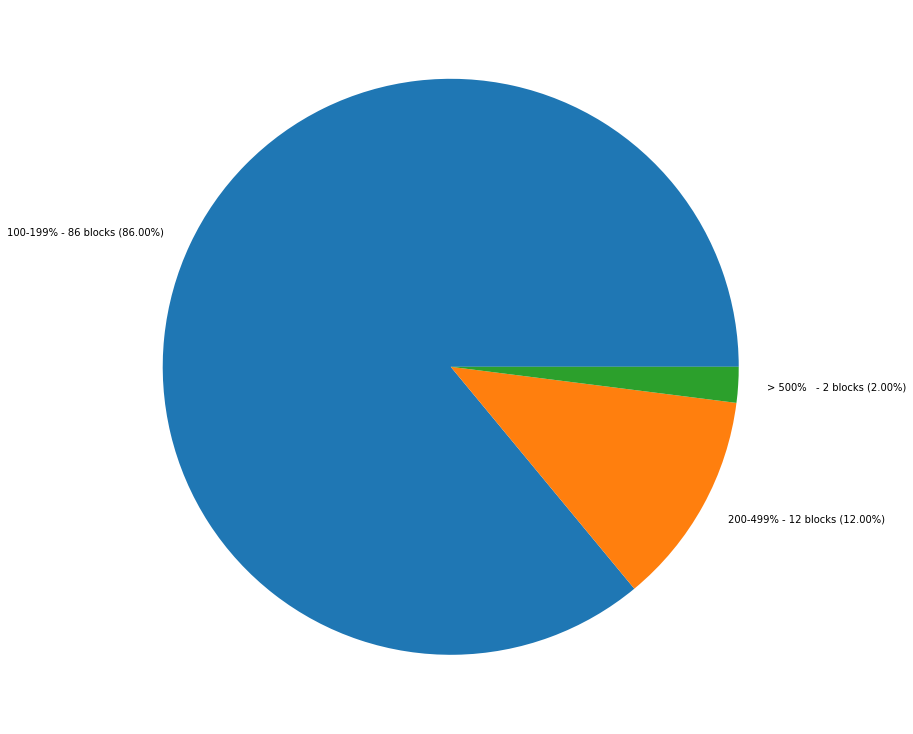

In [62]:
plt.rcParams["figure.figsize"] = (10, 10)
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('equal')

percentages = [
    '100-199% - ' + str(bt_100_199) + ' blocks (' + "%3.2f" % perc_bt_100_199 + '%)',
    '200-499% - ' + str(bt_200_499) + ' blocks (' + "%3.2f" % perc_bt_200_499 + '%)',
    '> 500%   - ' + str(bt_500_1100) + ' blocks (' + "%3.2f" % perc_bt_500_1100 + '%)'
]

groups = [bt_100_199, bt_200_499, bt_500_1100]
ax.pie(groups, labels=percentages)
plt.show()